# Классификация блюд нейронными сетями

100%|██████████| 4996278331/4996278331 [04:12<00:00, 19817695.76it/s]


Extracting /content/food_ds/food-101.tar.gz to /content/food_ds
Number of train data:  75750
Number of test data:  25250
Total number of classes:  101
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', '

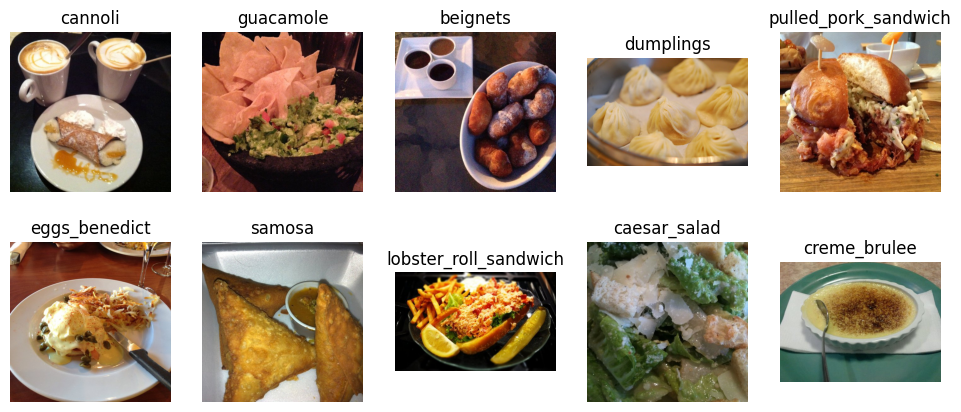

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, datasets, models
import os.path
from torchvision.transforms import RandomResizedCrop, RandomHorizontalFlip, ColorJitter
from torch.utils.data import DataLoader, ConcatDataset
from sklearn.utils import shuffle

food_train = datasets.Food101("/content/food_ds", split="train", transform=transforms.Compose([transforms.ToTensor()]), download = True)
food_test = datasets.Food101("/content/food_ds", split="test", transform=transforms.Compose([transforms.ToTensor()]), download = False)

print("Number of train data: ", len(food_train))
print("Number of test data: ", len(food_test))
print("Total number of classes: ", len(food_train.classes))
print(food_train.classes)

def TakeRandImgs(x, cols, rows):
  figure = plt.figure(figsize=(12, 5))
  for i in range(1, cols * rows + 1):
    index = torch.randint(len(x), size=(1,)).item()
    img, label = x[index]
    figure.add_subplot(rows, cols, i)
    plt.title(x.classes[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
  plt.show()

TakeRandImgs(food_train, 5, 2)

## Аугментация данных

Number of train data:  75750
Number of test data:  25250
Total number of classes:  101
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 

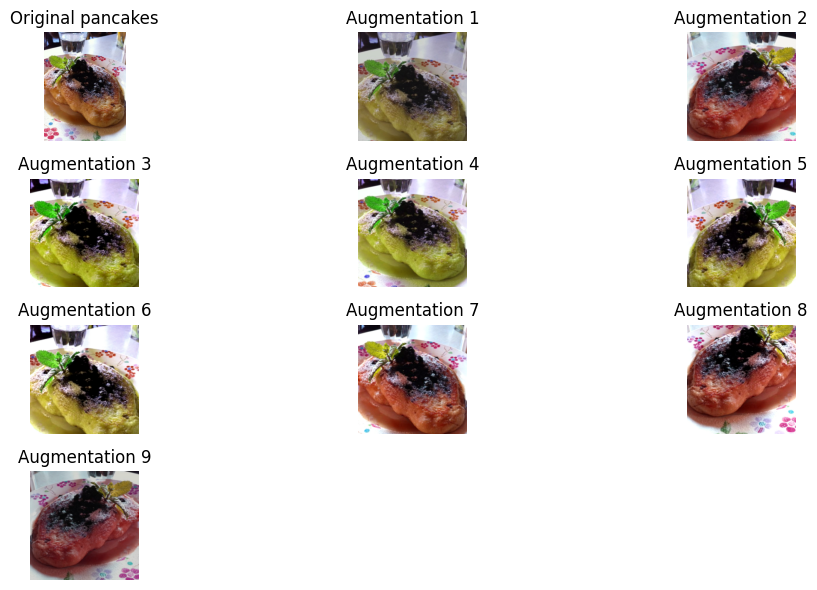

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms, datasets
from torchvision.transforms import RandomResizedCrop, RandomHorizontalFlip, ColorJitter
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

food_train = datasets.Food101("/content/food_ds", split="train", transform=transforms.Compose([transforms.ToTensor()]), download=False)
food_test = datasets.Food101("/content/food_ds", split="test", transform=transforms.Compose([transforms.ToTensor()]), download=False)

print("Number of train data: ", len(food_train))
print("Number of test data: ", len(food_test))
print("Total number of classes: ", len(food_train.classes))
print(food_train.classes)


def GenerateAugmentedImages(img, num_augmentations):
    augmented_images = []

    img_pil = transforms.ToPILImage()(img)

    for _ in range(num_augmentations):
        augmented_img = transform(img_pil)
        augmented_img = np.array(augmented_img)
        augmented_images.append(augmented_img)

    return augmented_images

def DisplayAugmentedImages(img, augmented_images, label):
    num_augmentations = len(augmented_images) + 1
    cols = min(num_augmentations, 3)
    rows = (num_augmentations + cols - 1) // cols

    figure, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()

    img_np = np.transpose(img, (1, 2, 0))

    axes[0].imshow(img_np)
    axes[0].set_title("Original " + food_train.classes[label])
    axes[0].axis("off")

    for i, augmented_img in enumerate(augmented_images):
        augmented_img_np = np.transpose(augmented_img, (1, 2, 0))
        axes[i + 1].imshow(augmented_img_np)
        axes[i + 1].set_title("Augmentation " + str(i + 1))
        axes[i + 1].axis("off")

    if num_augmentations < rows * cols:
        for j in range(num_augmentations, rows * cols):
            figure.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

transform = transforms.Compose([
    RandomResizedCrop(size = (224), scale=(0.7, 1.2), ratio=(0.88, 1.1)),
    RandomHorizontalFlip(),
    ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.1),
    transforms.ToTensor()
    ])

index = torch.randint(len(food_train), size=(1,)).item()
img, label = food_train[index]

augmented_images = GenerateAugmentedImages(img, 9)

DisplayAugmentedImages(img, augmented_images, label)

##Дополняем тренировочный набор новыми изображениями




In [2]:
transform_train = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
transform_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

food_train = datasets.Food101("/content/food_ds", split="train", transform=transform_test, download = True)
food_test = datasets.Food101("/content/food_ds", split="test", transform=transform_test, download = False)

augmented_food_train = datasets.Food101(
    "/content/food_ds/aug",
    split="train",
    transform=transform_train, download=True
)

print("Number of augmented train data: ", len(augmented_food_train))

combined_train = ConcatDataset([food_train, augmented_food_train])

print("Number of combined train data: ", len(combined_train))

indices = np.random.permutation(len(combined_train))

train_loader = DataLoader(combined_train, batch_size = 64,
                          sampler=torch.utils.data.SubsetRandomSampler(indices))

#train_loader = torch.utils.data.DataLoader(food_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(food_test, batch_size=64, shuffle=False)

100%|██████████| 4996278331/4996278331 [04:16<00:00, 19481880.40it/s]


Extracting /content/food_ds/aug/food-101.tar.gz to /content/food_ds/aug
Number of augmented train data:  75750
Number of combined train data:  151500


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Строим модель

In [4]:
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

model = models.resnet18(pretrained=True)

model.fc = torch.nn.Linear(in_features=512, out_features=101)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 247MB/s]


In [5]:
#model.load_state_dict(torch.load("model_epoch_10.pt", map_location=torch.device('cpu')))
model.load_state_dict(torch.load('/content/drive/MyDrive/model_epoch_16.pt'))

optimizer = torch.optim.Adam(model.parameters(), lr=0.00000001)

In [ ]:
num_epochs = 16
loss_tr = np.zeros(num_epochs)
loss_tst = np.zeros(num_epochs)

acc_tr = np.zeros(num_epochs)
acc_tst = np.zeros(num_epochs)

In [ ]:
for epoch in range(16, num_epochs):

    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted_train = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted_train.eq(labels).sum().item()

    train_loss = running_loss/len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    scheduler.step()

    model.eval()
    running_loss_val = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for data in test_loader:
            inputs_val, labels_val = data[0].to(device), data[1].to(device)

            outputs_val = model(inputs_val)
            loss_val = criterion(outputs_val, labels_val)

            running_loss_val += loss_val.item()

            _, predicted_val = outputs_val.max(1)
            total_val += labels_val.size(0)
            correct_val += predicted_val.eq(labels_val).sum().item()

    val_loss = running_loss_val/len(test_loader)
    val_accuracy = 100 * correct_val / total_val

    print(f"Эпоха: {epoch+1}. [Train] loss: {train_loss} acc: {train_accuracy} [Test] loss: {val_loss} acc: {val_accuracy}")
    loss_tr[epoch] = train_loss
    loss_tst[epoch] = val_loss
    acc_tr[epoch] = train_accuracy
    acc_tst[epoch] = val_accuracy
    torch.save(model.state_dict(), f"/content/food_ds/model_epoch_{epoch+1}.pt")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Эпоха: 17. [Train] loss: 1.051142379276555 acc: 72.90561056105611 [Test] loss: 0.7012523145827501 acc: 80.77227722772277


KeyboardInterrupt: ignored

In [7]:
def compute_confusion_matrix(model, dataloader, num_classes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    model.eval()

    with torch.no_grad():
        for data in dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted_labels = torch.max(outputs, dim=1)

            for i in range(len(labels)):
                true_label = labels[i].item()
                predicted_label = predicted_labels[i].item()
                confusion_matrix[true_label, predicted_label] += 1

    return confusion_matrix

num_classes = 101
confusion_matrix = compute_confusion_matrix(model, test_loader, num_classes)

print("Матрица ошибок:")
print(confusion_matrix)

Матрица ошибок:
[[143   1   6 ...   2   0   6]
 [  0 202   0 ...   0   0   0]
 [  6   0 221 ...   0   0   1]
 ...
 [  4   0   1 ... 203   0   0]
 [  0   0   1 ...   0 177   0]
 [  3   0   0 ...   0   0 217]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, classes):
    fig, ax = plt.subplots(figsize=(500, 500))

    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix')
    plt.colorbar(im, ax=ax)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, format(confusion_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(confusion_matrix, food_train.classes)


In [ ]:
class_acc = (np.diag(confusion_matrix) / confusion_matrix.sum(1)) * 100
sorted_indices = np.argsort(class_acc)[::-1]

for index in sorted_indices:
    print(f"{class_acc[index]:.2f} - {food_train.classes[index]}")

99.20 - edamame
94.80 - oysters
94.00 - spaghetti_bolognese
93.60 - spaghetti_carbonara
93.20 - macarons
92.80 - french_fries
92.80 - pho
92.80 - deviled_eggs
92.40 - frozen_yogurt
92.40 - hot_and_sour_soup
91.60 - eggs_benedict
91.60 - pad_thai
91.20 - dumplings
91.20 - sashimi
90.80 - bibimbap
90.40 - creme_brulee
90.40 - red_velvet_cake
90.40 - guacamole
90.40 - takoyaki
90.00 - onion_rings
89.60 - seaweed_salad
89.60 - fish_and_chips
89.60 - miso_soup
89.20 - lobster_roll_sandwich
88.80 - mussels
88.80 - caesar_salad
88.40 - beef_carpaccio
88.40 - baklava
88.00 - clam_chowder
88.00 - pancakes
88.00 - french_onion_soup
88.00 - beignets
88.00 - escargots
88.00 - cup_cakes
88.00 - sushi
87.60 - poutine
87.60 - club_sandwich
87.60 - cannoli
87.20 - fried_rice
87.20 - croque_madame
87.20 - lobster_bisque
86.80 - greek_salad
86.80 - waffles
86.40 - chicken_wings
86.40 - ramen
86.40 - pizza
85.60 - peking_duck
85.60 - prime_rib
85.20 - fried_calamari
85.20 - cheese_plate
84.80 - gyoza
83.

In [11]:
import numpy as np

def compute_evaluation_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]

    accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1_score = np.zeros(num_classes)

    for i in range(num_classes):
        true_positive = confusion_matrix[i, i]
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive

        precision[i] = true_positive / (true_positive + false_positive)
        recall[i] = true_positive / (true_positive + false_negative)
        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1_score = np.mean(f1_score)

    micro_precision = np.sum(confusion_matrix.diagonal()) / np.sum(confusion_matrix)
    micro_recall = np.sum(confusion_matrix.diagonal()) / np.sum(confusion_matrix)
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    return accuracy, macro_precision, macro_recall, macro_f1_score, micro_precision, micro_recall, micro_f1_score

accuracy, macro_precision, macro_recall, macro_f1_score, micro_precision, micro_recall, micro_f1_score = compute_evaluation_metrics(confusion_matrix)

print("Метрики оценки:")
print("Accuracy:", accuracy)
print("Macro Precision:", macro_precision)
print("Macro Recall:", macro_recall)
print("Macro F1-Score:", macro_f1_score)

print("Micro Precision:", micro_precision)
print("Micro Recall:", micro_recall)
print("Micro F1-Score:", micro_f1_score)


Метрики оценки:
Accuracy: 0.8177029702970297
Macro Precision: 0.817462451976111
Macro Recall: 0.8177029702970297
Macro F1-Score: 0.8169522151194355
Micro Precision: 0.8177029702970297
Micro Recall: 0.8177029702970297
Micro F1-Score: 0.8177029702970297


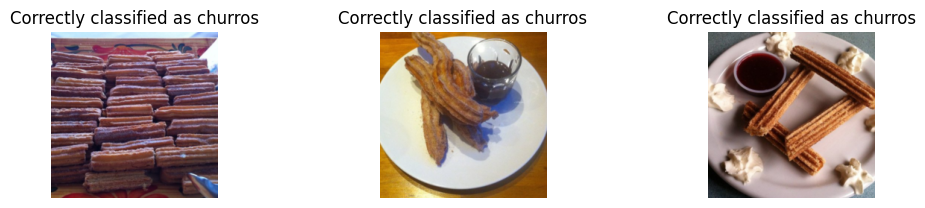

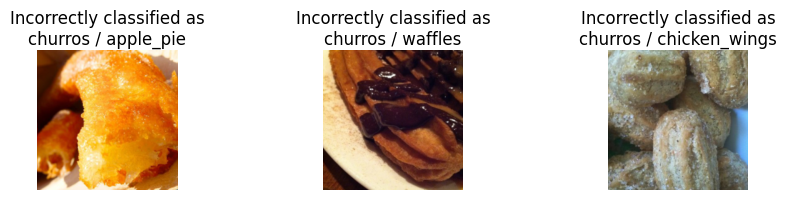

In [12]:
import random

correct_images = []
correct_labels = []
incorrect_images = []
incorrect_labels = []
real_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs_val, labels_val = data[0].to(device), data[1].to(device)

        outputs_val = model(inputs_val)
        _, predicted_val = outputs_val.max(1)

        for i in range(len(predicted_val)):
            if predicted_val[i] == labels_val[i] and len(correct_images) < 3:
                correct_images.append(inputs_val[i])
                correct_labels.append(labels_val[i])

            elif predicted_val[i] != labels_val[i] and len(incorrect_images) < 3:
                incorrect_images.append(inputs_val[i])
                incorrect_labels.append(labels_val[i])
                real_labels.append(predicted_val[i])

        if len(correct_images) == 3 and len(incorrect_images) == 3:
            break

# т.к. при загрузке в dataloader мы преображали изображения, нам надо провести обратные преобразования
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

if len(correct_images) > 0:
    plt.figure(figsize=(10, 4))
    for i in range(len(correct_images)):
        image = correct_images[i].permute(1, 2, 0).cpu().numpy()
        image = (image * std + mean).clip(0, 1)
        plt.subplot(2, 3, i+1)
        plt.imshow(image)
        plt.title(f'Correctly classified as {food_train.classes[correct_labels[i].item()]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No correctly classified images found.")

if len(incorrect_images) > 0:
    plt.figure(figsize=(10, 4))
    for i in range(len(incorrect_images)):
        image = incorrect_images[i].permute(1, 2, 0).cpu().numpy()
        image = (image * std + mean).clip(0, 1)
        plt.subplot(2, 3, i+1)
        plt.imshow(image)
        plt.imshow(image, vmin=0, vmax=1)
        plt.title(f'Incorrectly classified as\n{food_train.classes[incorrect_labels[i].item()]} / {food_train.classes[real_labels[i].item()]}', wrap=True)
        plt.axis('off')
    plt.subplots_adjust(wspace=0.4)
    plt.show()
else:
    print("No incorrectly classified images found.")


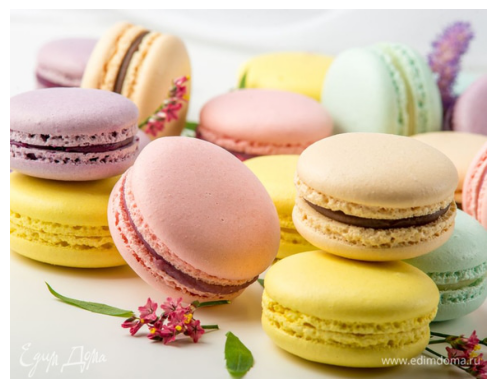

Predicted class: macarons
Top-5 Predicted Classes:
macarons
red_velvet_cake
ice_cream
cup_cakes
cheesecake


In [10]:
import requests
from PIL import Image
import torch
from torchvision.transforms import ToTensor, Normalize, CenterCrop
from io import BytesIO

image_url = "https://e3.edimdoma.ru/data/posts/0002/2907/22907-ed4_wide.jpg?1631188310"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.imshow(image)
plt.axis('off')
plt.show()

tensor_image = transform_test(image).unsqueeze(0)

model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
tensor_image = tensor_image.to(device)

with torch.no_grad():
    output = model(tensor_image)
    probabilities = torch.nn.functional.softmax(output, dim=1)[0]
    _, predicted_class = torch.max(output, 1)
    _, predicted_indices = torch.topk(probabilities, k=5)

print("Predicted class:", food_test.classes[predicted_class.item()])

print("Top-5 Predicted Classes:")
for idx in predicted_indices:
    print(food_test.classes[idx.item()])

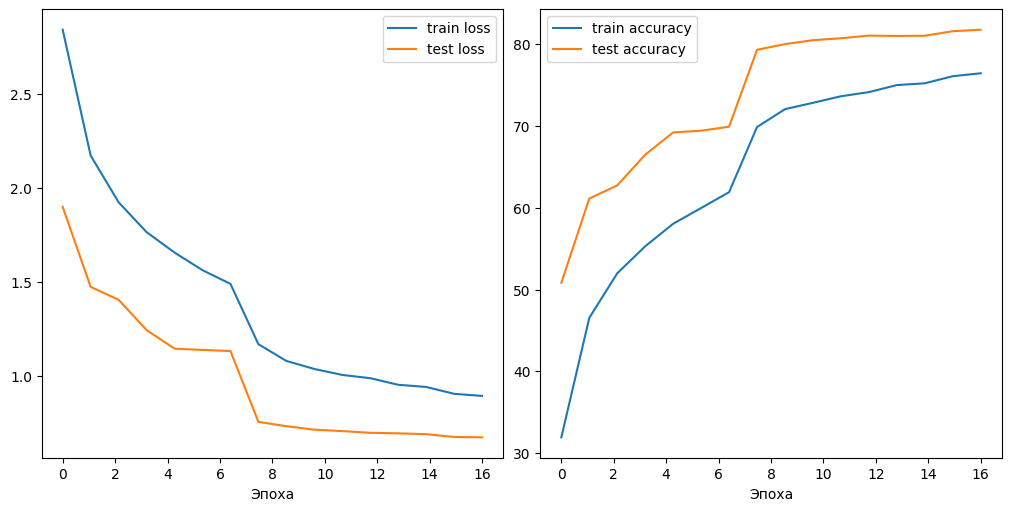

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10,5))

axs[0].plot(np.linspace(0, num_epochs, num_epochs), loss_tr, label='train loss')
axs[0].plot(np.linspace(0, num_epochs, num_epochs), loss_tst, label='test loss')
axs[0].set_xlabel('Эпоха')
axs[0].legend()
axs[1].plot(np.linspace(0, num_epochs, num_epochs), acc_tr, label='train accuracy')
axs[1].plot(np.linspace(0, num_epochs, num_epochs), acc_tst, label='test accuracy')
axs[1].set_xlabel('Эпоха')
axs[1].legend()
plt.show()
